In [175]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import scipy

from sklearn.cluster import KMeans
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as plo

import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [17]:
df_coded = pd.read_excel('customer_retention_dataset.xlsx',sheet_name='codedsheet')
df_coded.head(5)

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you

In [8]:
df = pd.read_excel('customer_retention_dataset.xlsx')
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

In [9]:
df.shape

(269, 71)

In [13]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [16]:
df.isnull().sum()

1Gender of respondent                                                                                                                                                                                                  0
2 How old are you?                                                                                                                                                                                                     0
3 Which city do you shop online from?                                                                                                                                                                                  0
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  0
5 Since How Long You are Shopping Online ?                                                                                          

In [194]:
df.duplicated().sum()

166

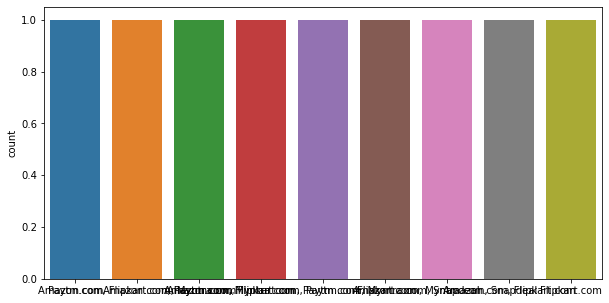

Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Flipkart.com                                                 15
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: Quickness to complete purchase, dtype: int64

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(df['Quickness to complete purchase'].unique())
plt.show()
df['Quickness to complete purchase'].unique()
df['Quickness to complete purchase'].value_counts()

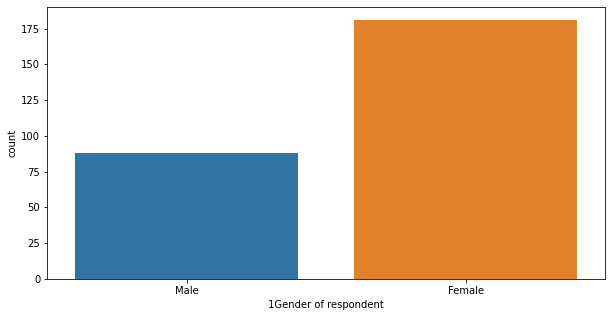

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64

In [170]:


#df['2 How old are you? '].value_counts()
plt.figure(figsize=(10,5))
sns.countplot(df['1Gender of respondent'])
plt.show()
df['1Gender of respondent'].value_counts()

In [181]:
# in Percentage Male
88/len(df)*100


32.71375464684015

In [182]:
# in Percentage Male
181/len(df)*100

67.28624535315984

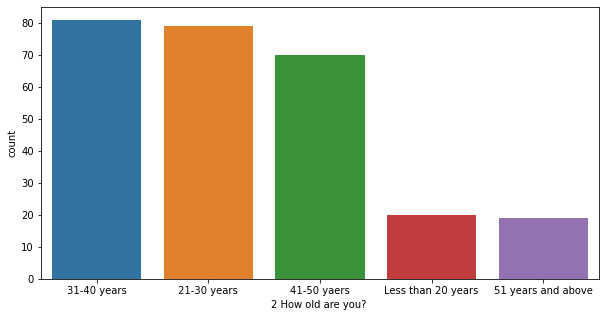

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64

In [55]:
#df['2 How old are you? '].value_counts()
plt.figure(figsize=(10,5))
sns.countplot(df['2 How old are you? '])
plt.show()
df['2 How old are you? '].value_counts()

In [191]:
categorical_col,numeric_col=[],[]
for i in df:
    if df[i].dtype=='O':
        categorical_col.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        numeric_col.append(i)
    else: continue
print('>>> Total Number of Feature::', df.shape[1])
print('>>> Number of categorical features::', len(categorical_col))
print('>>> Number of Numerical Feature::', len(numeric_col))

>>> Total Number of Feature:: 71
>>> Number of categorical features:: 70
>>> Number of Numerical Feature:: 1


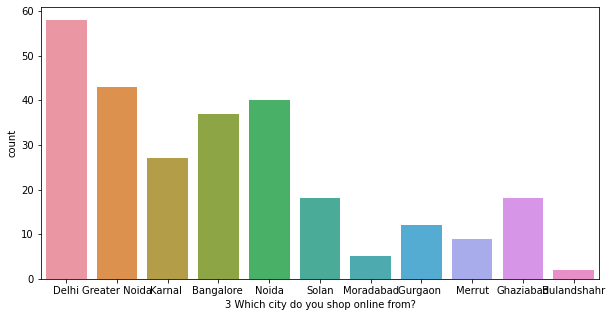

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(df['3 Which city do you shop online from?'])
plt.show()
df['3 Which city do you shop online from?'].value_counts()

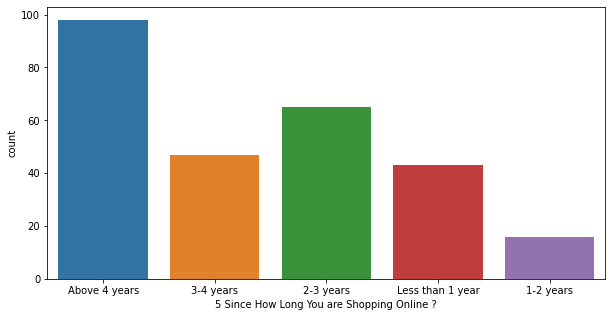

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: 5 Since How Long You are Shopping Online ?, dtype: int64

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(df['5 Since How Long You are Shopping Online ?'])
plt.show()
df['5 Since How Long You are Shopping Online ?'].value_counts()

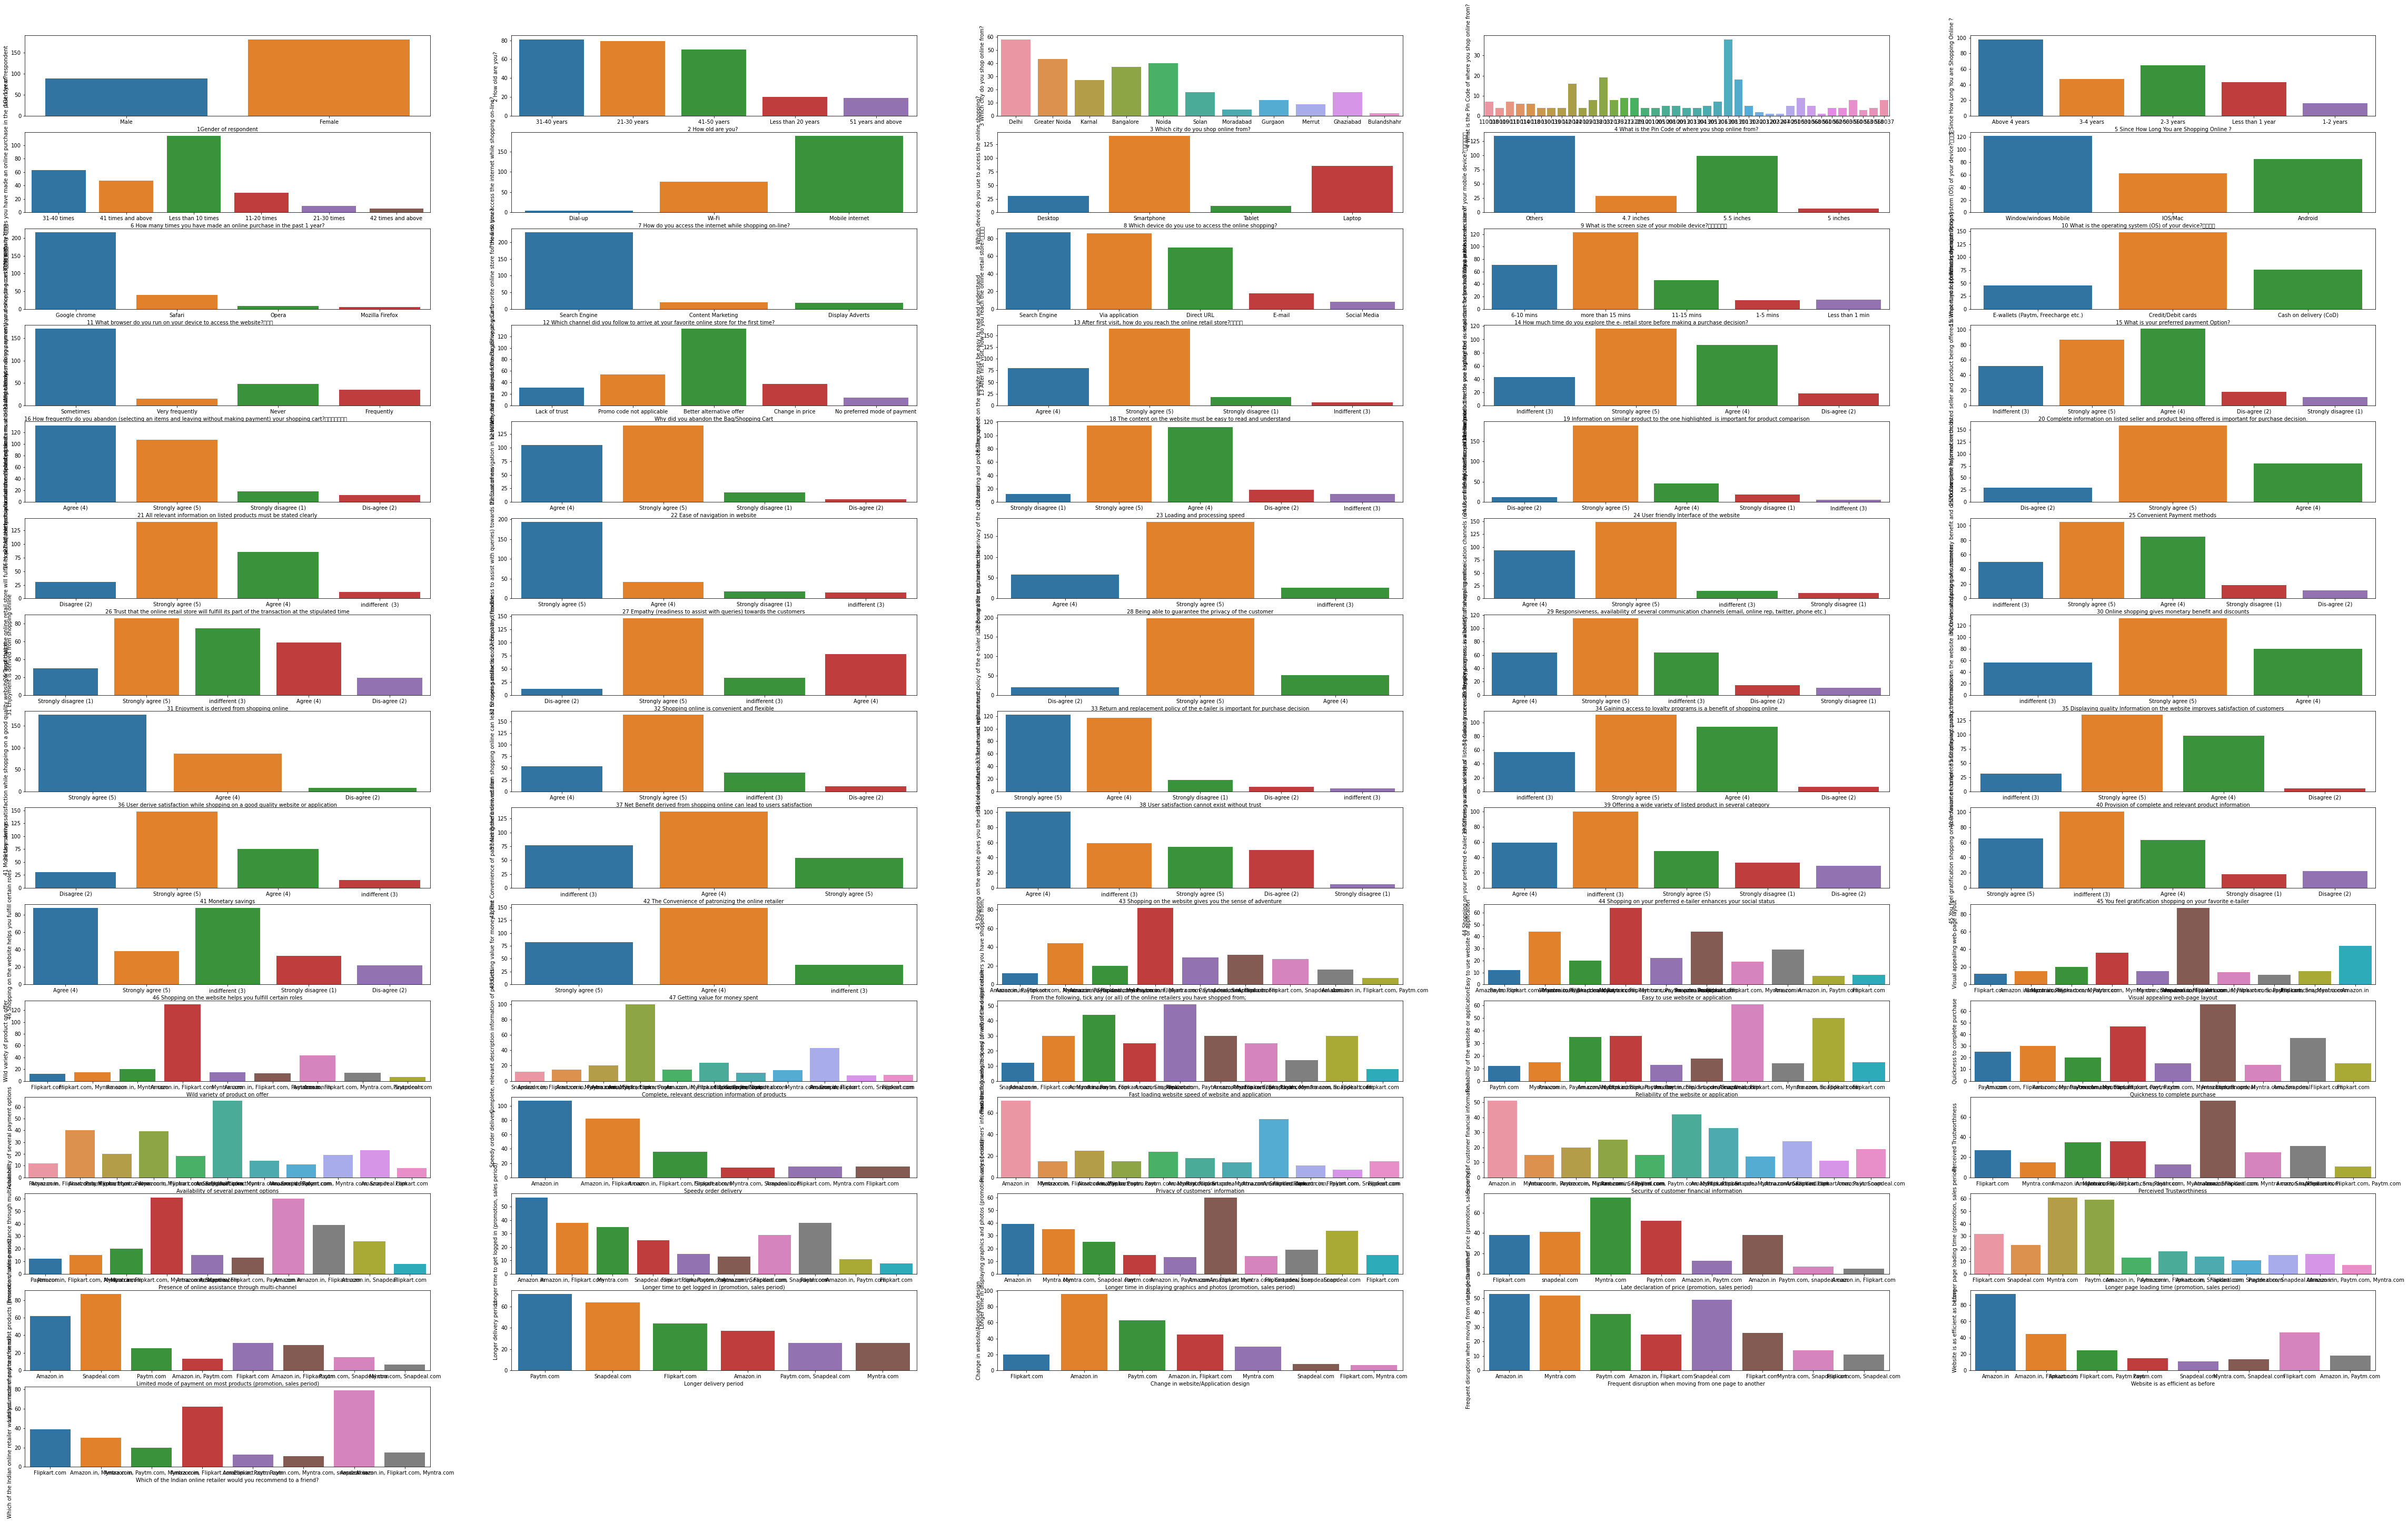

In [110]:
plt.figure(figsize =(80,50))
plt_no=1
for columns in df:
    if plt_no<75:
        ax=plt.subplot(15,5,plt_no)
        sns.countplot(df[columns])
        plt.ylabel(columns)
    plt_no +=1
plt.show()

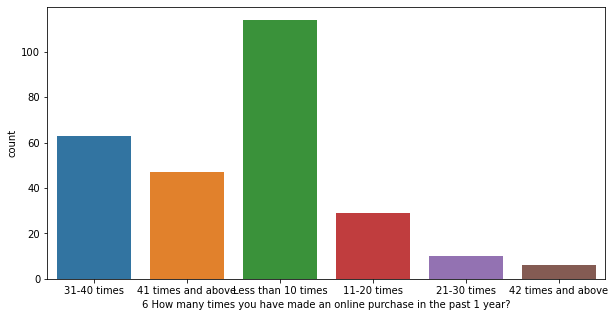

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: 6 How many times you have made an online purchase in the past 1 year?, dtype: int64

In [87]:

plt.figure(figsize=(10,5))
sns.countplot(df['6 How many times you have made an online purchase in the past 1 year?'])
plt.show()
df['6 How many times you have made an online purchase in the past 1 year?'].value_counts()

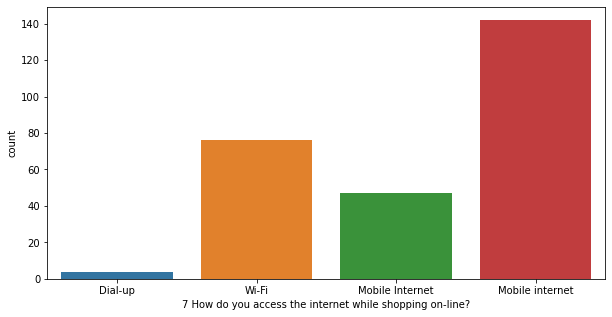

Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: 7 How do you access the internet while shopping on-line?, dtype: int64

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(df['7 How do you access the internet while shopping on-line?'])
plt.show()
df['7 How do you access the internet while shopping on-line?'].value_counts()

In [71]:
# We observed Mobile INternet twice thus replacing one by other to make the data more crisp 
df['7 How do you access the internet while shopping on-line?'].replace(to_replace ='Mobile Internet',
                 value ='Mobile internet',inplace =True)

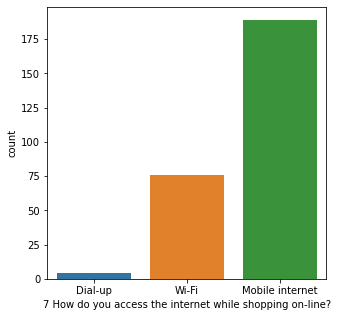

Mobile internet    189
Wi-Fi               76
Dial-up              4
Name: 7 How do you access the internet while shopping on-line?, dtype: int64

In [75]:
# REPLOT 

plt.figure(figsize=(5,5))
sns.countplot(df['7 How do you access the internet while shopping on-line?'])
plt.show()
df['7 How do you access the internet while shopping on-line?'].value_counts()

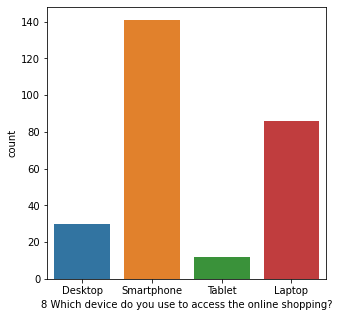

Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: 8 Which device do you use to access the online shopping?, dtype: int64

In [76]:
plt.figure(figsize=(5,5))
sns.countplot(df['8 Which device do you use to access the online shopping?'])
plt.show()
df['8 Which device do you use to access the online shopping?'].value_counts()

In [79]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

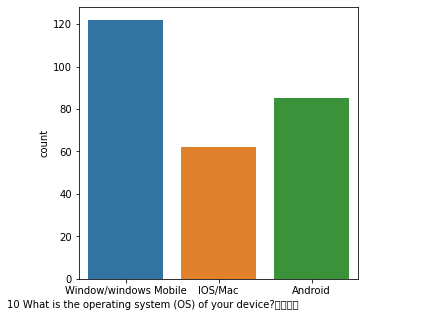

Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: 10 What is the operating system (OS) of your device?\t\t\t\t                                          , dtype: int64

In [80]:
plt.figure(figsize=(5,5))
sns.countplot(df['10 What is the operating system (OS) of your device?\t\t\t\t                                          '])
plt.show()
df['10 What is the operating system (OS) of your device?\t\t\t\t                                          '].value_counts()

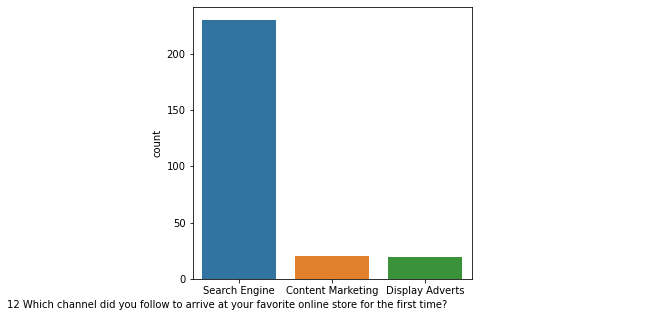

Search Engine        230
Content Marketing     20
Display Adverts       19
Name: 12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   , dtype: int64

In [81]:
plt.figure(figsize=(5,5))
sns.countplot(df['12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   '])
plt.show()
df['12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   '].value_counts()  

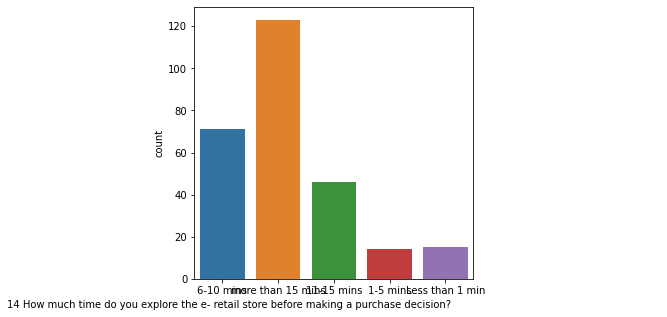

more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: 14 How much time do you explore the e- retail store before making a purchase decision?                                                                   , dtype: int64

In [82]:
plt.figure(figsize=(5,5))
sns.countplot(df['14 How much time do you explore the e- retail store before making a purchase decision?                                                                   '])
plt.show()
df['14 How much time do you explore the e- retail store before making a purchase decision?                                                                   '].value_counts()

In [99]:
df.rename(columns={'17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ':'Why did you abandon the Bag/Shopping Cart'},inplace=True)

In [100]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,Why did you abandon the Bag/Shopping Cart,18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend t

In [ ]:
# NOTE : NO FEMALE LAPTOP USER 

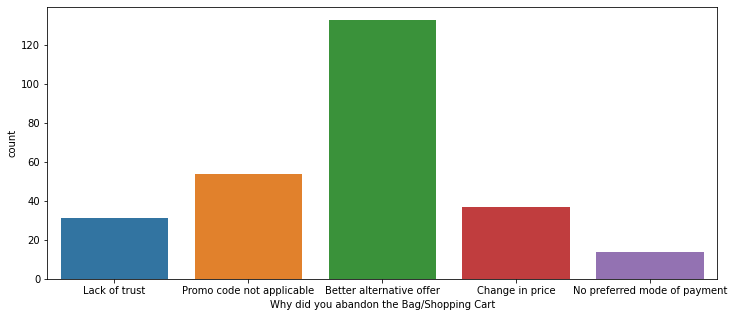

Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: Why did you abandon the Bag/Shopping Cart, dtype: int64

In [198]:
plt.figure(figsize=(12,5))
sns.countplot(df['Why did you abandon the Bag/Shopping Cart'])
plt.show()
df['Why did you abandon the Bag/Shopping Cart'].value_counts()

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(df['Why did you abandon the Bag/Shopping Cart'])
plt.show()
df['Why did you abandon the Bag/Shopping Cart'].value_counts()

In [102]:
df.rename(columns={'15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ':'15 What is your preferred payment Option?'},inplace=True)

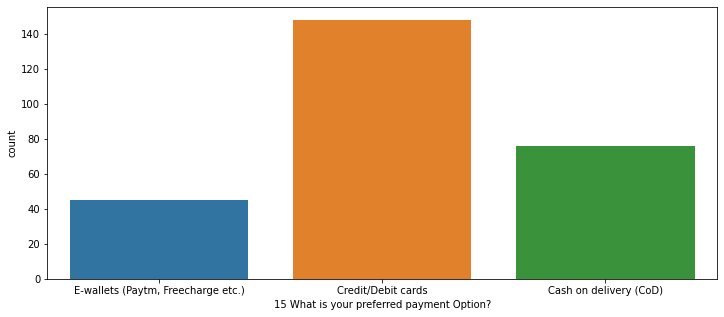

Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: 15 What is your preferred payment Option?, dtype: int64

In [199]:
plt.figure(figsize=(12,5))
sns.countplot(df['15 What is your preferred payment Option?'])
plt.show()
df['15 What is your preferred payment Option?'].value_counts()

In [112]:
df['19 Information on similar product to the one highlighted  is important for product comparison'].value_counts()

Strongly agree (5)    116
Agree (4)              92
Indifferent (3)        43
Dis-agree (2)          18
Name: 19 Information on similar product to the one highlighted  is important for product comparison, dtype: int64

In [113]:
df['20 Complete information on listed seller and product being offered is important for purchase decision.'].value_counts()

Agree (4)                101
Strongly agree (5)        87
Indifferent (3)           52
Dis-agree (2)             18
Strongly disagree (1)     11
Name: 20 Complete information on listed seller and product being offered is important for purchase decision., dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Indifferent (3)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'Agree (4)'),
  Text(3, 0, 'Dis-agree (2)'),
  Text(4, 0, 'Strongly disagree (1)')])

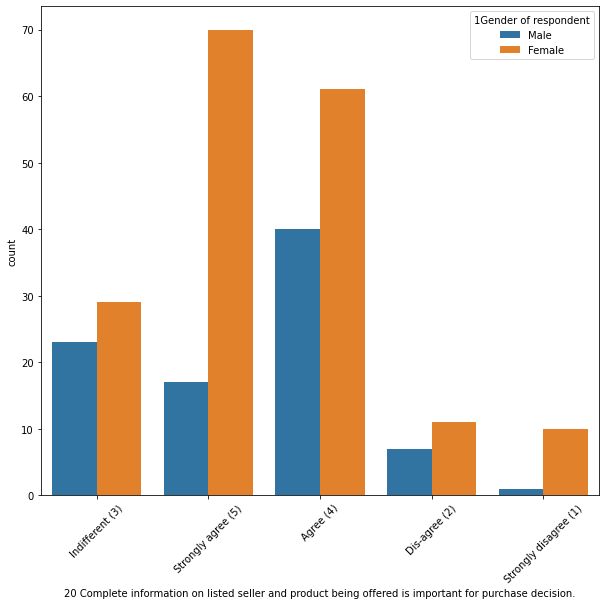

In [127]:
plt.figure(figsize=(10,9))
sns.countplot(x=df['20 Complete information on listed seller and product being offered is important for purchase decision.'],hue=df['1Gender of respondent'],data=df)
plt.xticks(rotation=45)

In [ ]:
#Note: Mostly Female prefer more detailed results 

Strongly agree (5)       141
Agree (4)                105
Strongly disagree (1)     18
Dis-agree (2)              5
Name: 22 Ease of navigation in website, dtype: int64

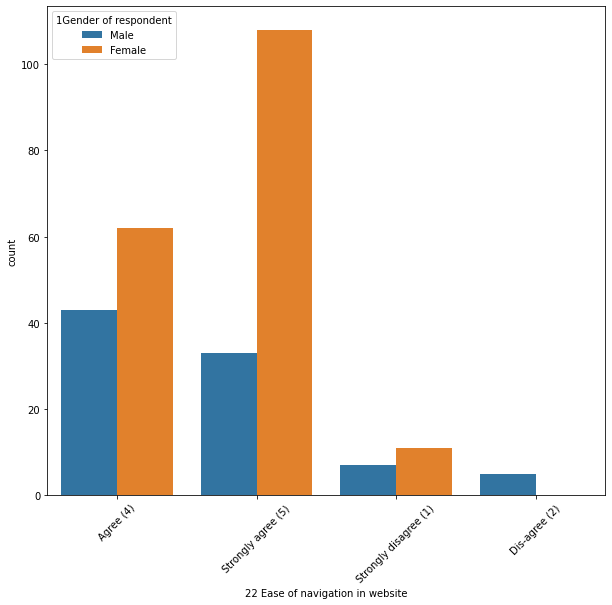

In [133]:
plt.figure(figsize=(10,9))
sns.countplot(x=df['22 Ease of navigation in website'],hue=df['1Gender of respondent'],data=df)
plt.xticks(rotation=45)

df['22 Ease of navigation in website'].value_counts()

In [128]:
df['24 User friendly Interface of the website'].value_counts()

Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Dis-agree (2)             12
Indifferent (3)            5
Name: 24 User friendly Interface of the website, dtype: int64

In [134]:
df['33 Return and replacement policy of the e-tailer is important for purchase decision'].value_counts()

Strongly agree (5)    198
Agree (4)              51
Dis-agree (2)          20
Name: 33 Return and replacement policy of the e-tailer is important for purchase decision, dtype: int64

In [135]:
df['32 Shopping online is convenient and flexible'].value_counts()

Strongly agree (5)    146
Agree (4)              78
indifferent (3)        33
Dis-agree (2)          12
Name: 32 Shopping online is convenient and flexible, dtype: int64

In [136]:
df['37 Net Benefit derived from shopping online can lead to users satisfaction'].value_counts()

Strongly agree (5)    164
Agree (4)              54
indifferent (3)        40
Dis-agree (2)          11
Name: 37 Net Benefit derived from shopping online can lead to users satisfaction, dtype: int64

In [132]:
df['41 Monetary savings'].value_counts()

Strongly agree (5)    148
Agree (4)              75
Disagree (2)           31
indifferent (3)        15
Name: 41 Monetary savings, dtype: int64

In [138]:
df['47 Getting value for money spent'].value_counts()

Agree (4)             149
Strongly agree (5)     82
indifferent (3)        38
Name: 47 Getting value for money spent, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Strongly agree (5)'),
  Text(1, 0, 'Agree (4)'),
  Text(2, 0, 'indifferent (3)')])

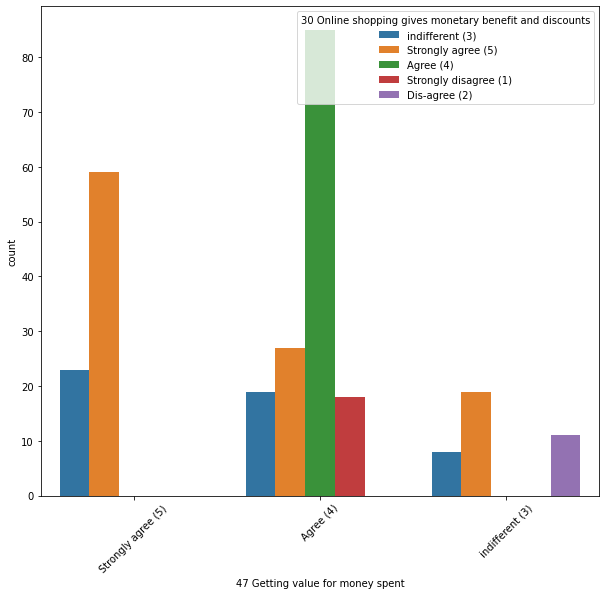

In [140]:
plt.figure(figsize=(10,9))
sns.countplot(x=df['47 Getting value for money spent'],hue=df['30 Online shopping gives monetary benefit and discounts'],data=df)
plt.xticks(rotation=45)

In [ ]:
# Discount plays a  majot role 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Greater Noida'),
  Text(2, 0, 'Karnal '),
  Text(3, 0, 'Bangalore '),
  Text(4, 0, 'Noida'),
  Text(5, 0, 'Solan'),
  Text(6, 0, 'Moradabad'),
  Text(7, 0, 'Gurgaon '),
  Text(8, 0, 'Merrut'),
  Text(9, 0, 'Ghaziabad'),
  Text(10, 0, 'Bulandshahr')])

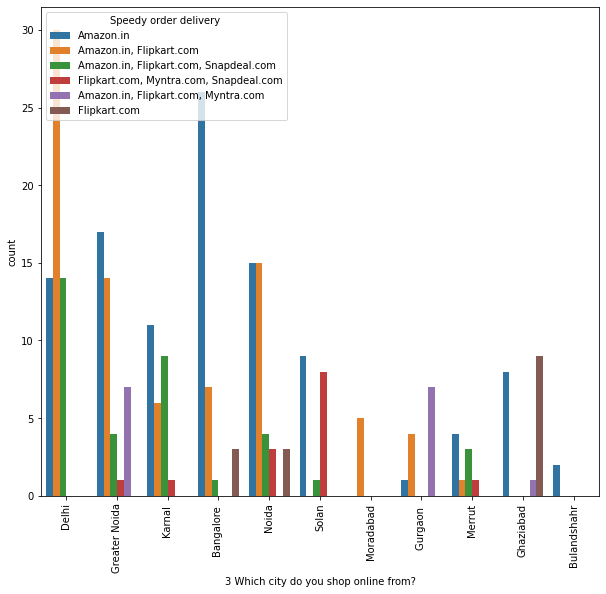

In [168]:
plt.figure(figsize=(10,9))
sns.countplot(x=df['3 Which city do you shop online from?'],hue=df['Speedy order delivery '],data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Greater Noida'),
  Text(2, 0, 'Karnal '),
  Text(3, 0, 'Bangalore '),
  Text(4, 0, 'Noida'),
  Text(5, 0, 'Solan'),
  Text(6, 0, 'Moradabad'),
  Text(7, 0, 'Gurgaon '),
  Text(8, 0, 'Merrut'),
  Text(9, 0, 'Ghaziabad'),
  Text(10, 0, 'Bulandshahr')])

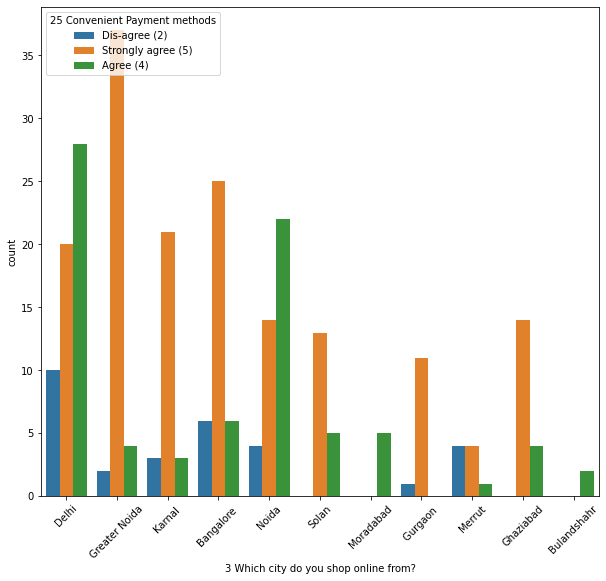

In [148]:
plt.figure(figsize=(10,9))
sns.countplot(x=df['3 Which city do you shop online from?'],hue=df['25 Convenient Payment methods'],data=df)
plt.xticks(rotation=45)

In [ ]:
#Convinencein Payment  isimp for tier 2,3 cities 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '31-40 times'),
  Text(1, 0, '41 times and above'),
  Text(2, 0, 'Less than 10 times'),
  Text(3, 0, '11-20 times'),
  Text(4, 0, '21-30 times'),
  Text(5, 0, '42 times and above')])

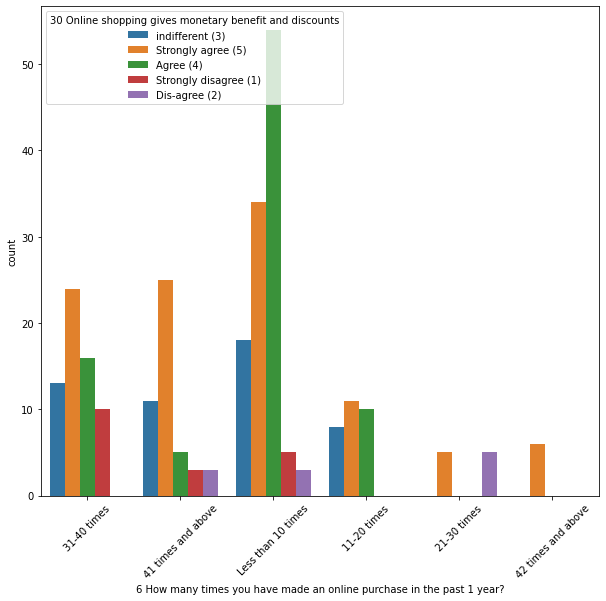

In [152]:
plt.figure(figsize=(10,9))
sns.countplot(x=df['6 How many times you have made an online purchase in the past 1 year?'],hue=df['30 Online shopping gives monetary benefit and discounts'],data=df)
plt.xticks(rotation=45)

In [ ]:
#Frequent shopper prefer Higher Benifits 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '31-40 times'),
  Text(1, 0, '41 times and above'),
  Text(2, 0, 'Less than 10 times'),
  Text(3, 0, '11-20 times'),
  Text(4, 0, '21-30 times'),
  Text(5, 0, '42 times and above')])

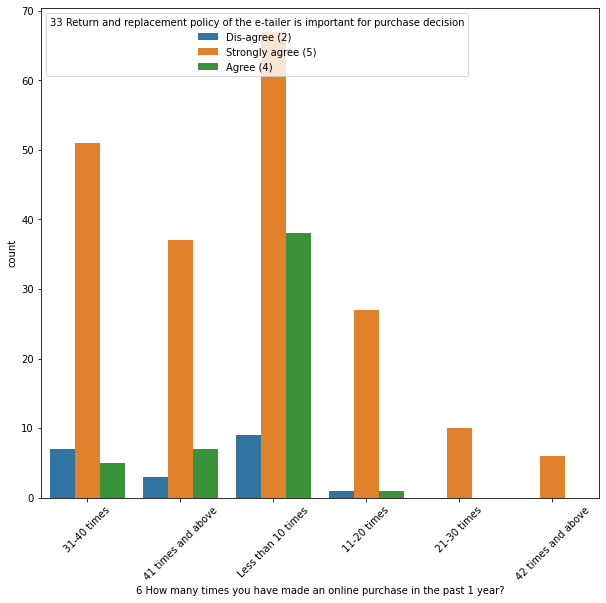

In [153]:
plt.figure(figsize=(10,9))
sns.countplot(x=df['6 How many times you have made an online purchase in the past 1 year?'],hue=df['33 Return and replacement policy of the e-tailer is important for purchase decision'],data=df)
plt.xticks(rotation=45)

In [ ]:
# Return facilty is very important 

In [156]:
df['From the following, tick any (or all) of the online retailers you have shopped from;                                                                           '].value_counts()

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: From the following, tick any (or all) of the online retailers you have shopped from;                                                                           , dtype: int64

In [158]:
df['Which of the Indian online retailer would you recommend to a friend?'].value_counts()

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Flipkart.com'),
  Text(1, 0, 'Amazon.in, Myntra.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com'),
  Text(4, 0, 'Amazon.in, Paytm.com'),
  Text(5, 0, 'Flipkart.com, Paytm.com, Myntra.com, snapdeal.com'),
  Text(6, 0, 'Amazon.in'),
  Text(7, 0, 'Amazon.in, Flipkart.com, Myntra.com')])

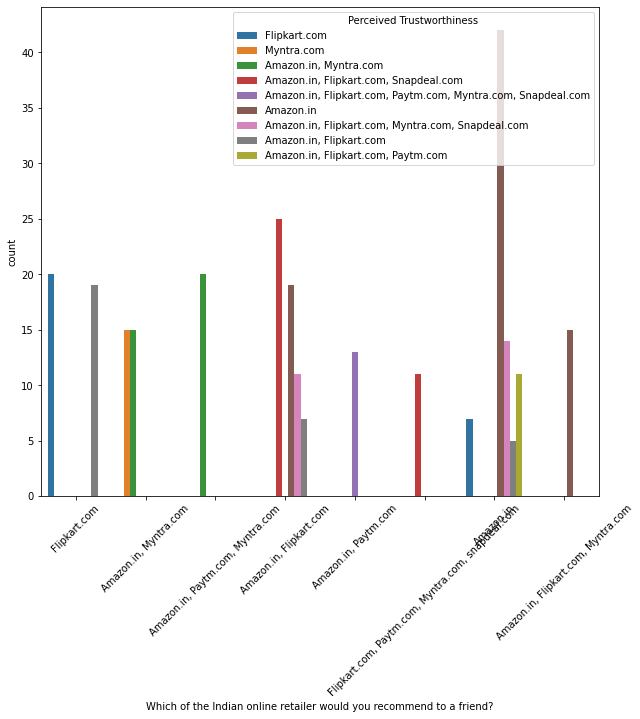

In [159]:
plt.figure(figsize=(10,9))
sns.countplot(x=df['Which of the Indian online retailer would you recommend to a friend?'],hue=df['Perceived Trustworthiness'],data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Flipkart.com'),
  Text(1, 0, 'Amazon.in, Myntra.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com'),
  Text(4, 0, 'Amazon.in, Paytm.com'),
  Text(5, 0, 'Flipkart.com, Paytm.com, Myntra.com, snapdeal.com'),
  Text(6, 0, 'Amazon.in'),
  Text(7, 0, 'Amazon.in, Flipkart.com, Myntra.com')])

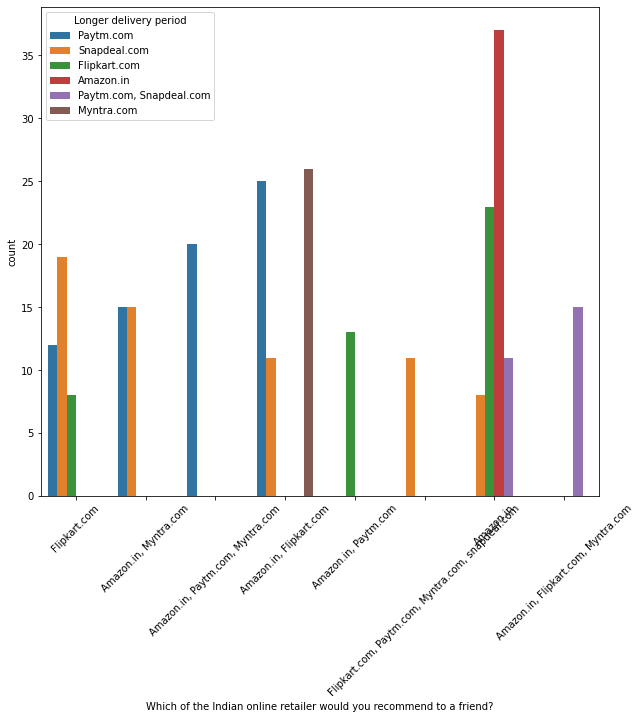

In [162]:
plt.figure(figsize=(10,9))
sns.countplot(x=df['Which of the Indian online retailer would you recommend to a friend?'],hue=df['Longer delivery period'],data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '31-40 years'),
  Text(1, 0, '21-30 years'),
  Text(2, 0, '41-50 yaers'),
  Text(3, 0, 'Less than 20 years'),
  Text(4, 0, '51 years and above')])

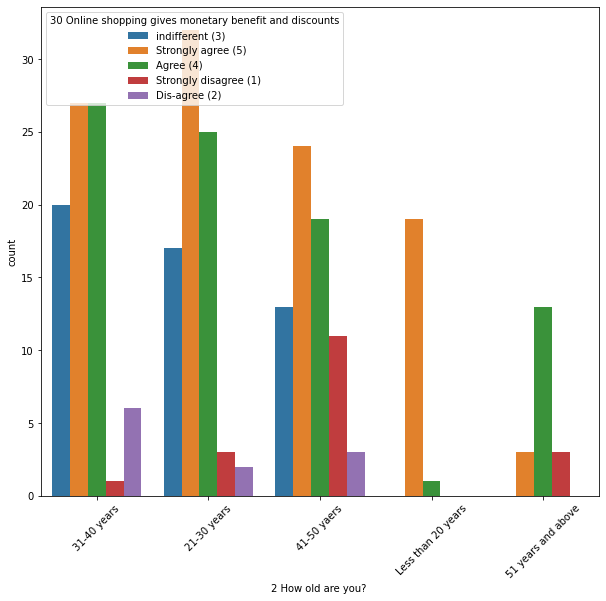

In [167]:
plt.figure(figsize=(10,9))
sns.countplot(x=df['2 How old are you? '],hue=df['30 Online shopping gives monetary benefit and discounts'],data=df)
plt.xticks(rotation=45)  

In [ ]:
#YOung ppl prefer Returnablity 

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Desktop'),
  Text(1, 0, 'Smartphone'),
  Text(2, 0, 'Tablet'),
  Text(3, 0, 'Laptop')])

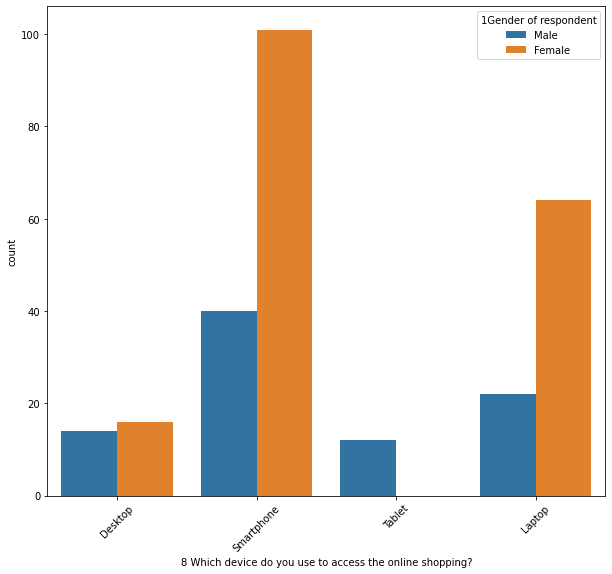

In [169]:
plt.figure(figsize=(10,9))
sns.countplot(x=df['8 Which device do you use to access the online shopping?'],hue=df['1Gender of respondent'],data=df)
plt.xticks(rotation=45)  

In [ ]:
# NO FEMALE USERS FOR LAPTOP

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Others'),
  Text(1, 0, '4.7 inches'),
  Text(2, 0, '5.5 inches'),
  Text(3, 0, '5 inches')])

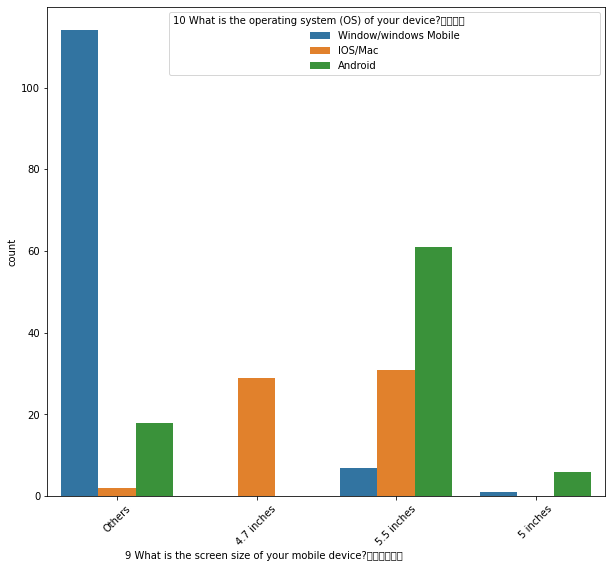

In [184]:
plt.figure(figsize=(10,9))
sns.countplot(x=df['9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        '],hue=df['10 What is the operating system (OS) of your device?\t\t\t\t                                          '],data=df)
plt.xticks(rotation=45)  

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Search Engine'),
  Text(1, 0, 'Via application'),
  Text(2, 0, 'Direct URL'),
  Text(3, 0, 'E-mail'),
  Text(4, 0, 'Social Media')])

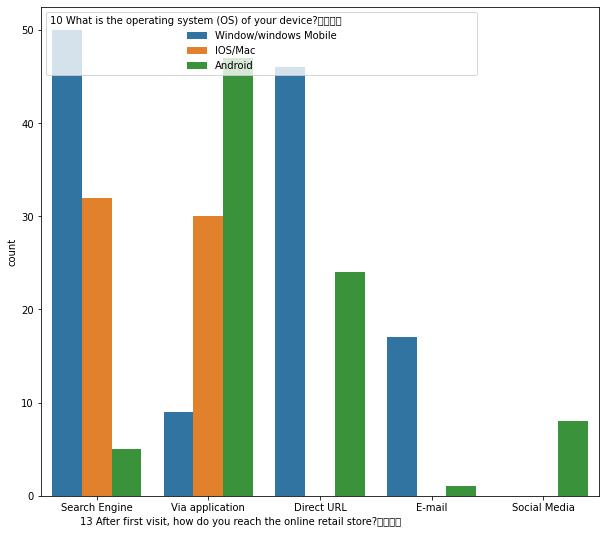

In [186]:
plt.figure(figsize=(10,9))
sns.countplot(x=df['13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   '],hue=df['10 What is the operating system (OS) of your device?\t\t\t\t                                          '],data=df)
plt.xticks(rotation=0)  

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Paytm.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Myntra.com'),
  Text(7, 0, 'Amazon.in'),
  Text(8, 0, 'Amazon.in, Paytm.com'),
  Text(9, 0, 'Flipkart.com')])

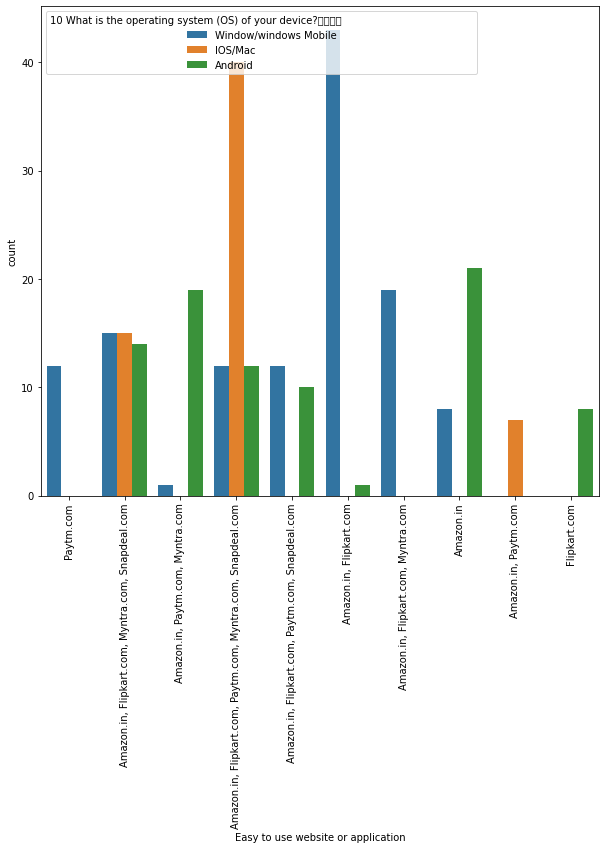

In [190]:
plt.figure(figsize=(10,9))
sns.countplot(x=df['Easy to use website or application'],hue=df['10 What is the operating system (OS) of your device?\t\t\t\t                                          '],data=df)
plt.xticks(rotation=90) 